In [1]:
# multidimensional arrays
import numpy as np
import math

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# linear regression
from sklearn.linear_model import LinearRegression

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 16
plt.rcParams["figure.figsize"] = (7,5)

In [2]:
# Random initial state
#reading temperatures, average energy and magnetization per spin, 
#specific heat capacity and susceptibility per spin

T = np.loadtxt("7_rand_20.txt", usecols=0, dtype='double')

# L=40
energy_40 = np.loadtxt("7_rand_40.txt", usecols=1, dtype='double')
magn_40 = np.loadtxt("7_rand_40.txt", usecols=2, dtype='double')
Cv_40 = np.loadtxt("7_rand_40.txt", usecols=3, dtype='double')
X_40 = np.loadtxt("7_rand_40.txt", usecols=4, dtype='double')

# L=60
energy_60 = np.loadtxt("7_rand_60.txt", usecols=1, dtype='double')
magn_60 = np.loadtxt("7_rand_60.txt", usecols=2, dtype='double')
Cv_60 = np.loadtxt("7_rand_60.txt", usecols=3, dtype='double')
X_60 = np.loadtxt("7_rand_60.txt", usecols=4, dtype='double')

# L=80
energy_80 = np.loadtxt("7_rand_80.txt", usecols=1, dtype='double')
magn_80 = np.loadtxt("7_rand_80.txt", usecols=2, dtype='double')
Cv_80 = np.loadtxt("7_rand_80.txt", usecols=3, dtype='double')
X_80 = np.loadtxt("7_rand_80.txt", usecols=4, dtype='double')

# L=100
energy_100 = np.loadtxt("7_rand_100.txt", usecols=1, dtype='double')
magn_100 = np.loadtxt("7_rand_100.txt", usecols=2, dtype='double')
Cv_100 = np.loadtxt("7_rand_100.txt", usecols=3, dtype='double')
X_100 = np.loadtxt("7_rand_100.txt", usecols=4, dtype='double')


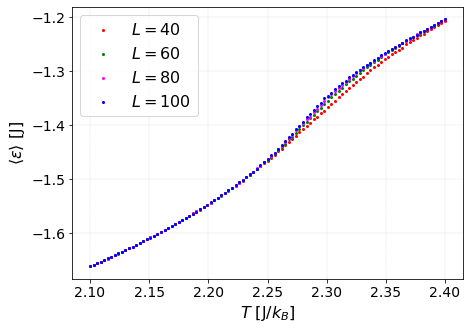

In [3]:
# Plotting energies 
plt.scatter(T, energy_40, color="red",label="$L=40$", s=4)
plt.scatter(T, energy_60, color="green",label="$L=60$", s=4)
plt.scatter(T, energy_80, color="magenta",label="$L=80$", s=4)
plt.scatter(T, energy_100, color="blue",label="$L=100$", s=4)

# add axis labels and legend
plt.xlabel("$T$ [J/$k_B$]")
plt.ylabel(r"$\langle\epsilon\rangle$ [J]")
plt.legend()

# add grid
plt.grid(linestyle = '--', linewidth = 0.2)

# save plot as pdf
plt.savefig("Energy.pdf")

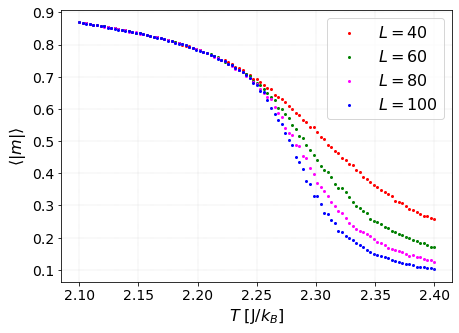

In [4]:
# Plotting magnetization 
plt.scatter(T, magn_40, color="red",label="$L=40$", s=4)
plt.scatter(T, magn_60, color="green",label="$L=60$", s=4)
plt.scatter(T, magn_80, color="magenta",label="$L=80$", s=4)
plt.scatter(T, magn_100, color="blue",label="$L=100$", s=4)

# add axis labels and legend
plt.xlabel("$T$ [J/$k_B$]")
plt.ylabel(r"$\langle|m|\rangle$")
plt.legend()

# add grid
plt.grid(linestyle = '--', linewidth = 0.2)

# save plot as pdf
plt.savefig("Magnetization.pdf")

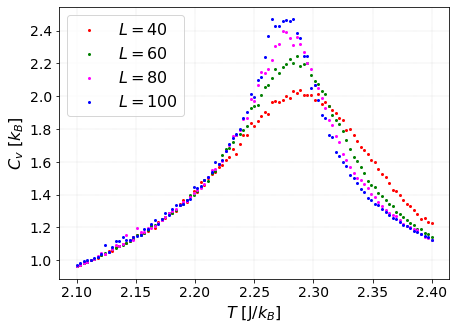

In [9]:
# Plotting specific heat capacity 
plt.scatter(T, Cv_40, color="red",label="$L=40$", s=4)
plt.scatter(T, Cv_60, color="green",label="$L=60$", s=4)
plt.scatter(T, Cv_80, color="magenta",label="$L=80$", s=4)
plt.scatter(T, Cv_100, color="blue",label="$L=100$", s=4)

# add axis labels and legend
plt.xlabel("$T$ [J/$k_B$]")
plt.ylabel("$C_v$ [$k_B$]")
plt.legend()

# add grid
plt.grid(linestyle = '--', linewidth = 0.2)

# save plot as pdf
plt.savefig("Heat_capacity.pdf")

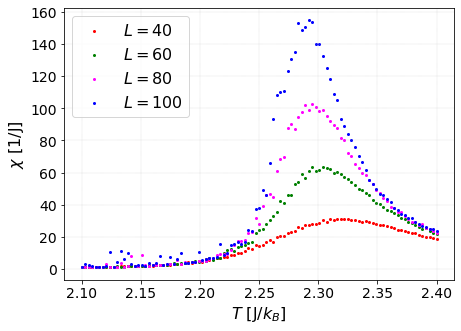

In [10]:
# Plotting susceptibility
plt.scatter(T, X_40, color="red",label="$L=40$", s=4)
plt.scatter(T, X_60, color="green",label="$L=60$", s=4)
plt.scatter(T, X_80, color="magenta",label="$L=80$", s=4)
plt.scatter(T, X_100, color="blue",label="$L=100$", s=4)

# add axis labels and legend
plt.xlabel("$T$ [J/$k_B$]")
plt.ylabel("$\chi$ [1/J]")
plt.legend()

# add grid
plt.grid(linestyle = '--', linewidth = 0.2)

# save plot as pdf
plt.savefig("Susceptibility.pdf")

In [7]:
# Linear regression for critical T - Cv values

# Compute critical temperatures for each L value
#L=40
id_40 = np.where(Cv_40 == np.amax(Cv_40))
Tc_40 = T[id_40] 
print("Tc for L=40 ", Tc_40)

#L=60
id_60 = np.where(Cv_60 == np.amax(Cv_60))
Tc_60 = T[id_60] 
print("Tc for L=60 ", Tc_60)

#L=80
id_80 = np.where(Cv_80 == np.amax(Cv_80))
Tc_80 = T[id_80] 
print("Tc for L=80 ", Tc_80)

#L=100
Cv_100_max = Cv_100[56:60].max()
id_100 = np.where(Cv_100 == Cv_100_max)
Tc_100 = T[id_100] 
print("Tc for L=100 ", Tc_100)

# Perform linear regression 
x = np.array([1/40, 1/60, 1/80, 1/100]).reshape((-1,1)) # 1/L values
y = np.array([Tc_40, Tc_60, Tc_80, Tc_100]) # Tc values

model = LinearRegression().fit(x, y)
print('slope:', model.coef_) # a value
print('intercept:', model.intercept_) # T(L=inf) value

Tc for L=40  [2.289]
Tc for L=60  [2.286]
Tc for L=80  [2.274]
Tc for L=100  [2.277]
slope: [[0.95421687]]
intercept: [2.26619277]


In [8]:
# Linear regression for critical T - X values

# Compute critical temperatures for each L value
#L=40
id_40 = np.where(X_40 == np.amax(X_40))
Tc_40 = T[id_40] 
print("Tc for L=40 ", Tc_40)

#L=60
id_60 = np.where(X_60 == np.amax(X_60))
Tc_60 = T[id_60] 
print("Tc for L=60 ", Tc_60)

#L=80
id_80 = np.where(X_80 == np.amax(X_80))
Tc_80 = T[id_80] 
print("Tc for L=80 ", Tc_80)

#L=100
id_100 = np.where(X_100 == np.amax(X_100))
Tc_100 = T[id_100] 
print("Tc for L=100 ", Tc_100)

# Perform linear regression 
x = np.array([1/40, 1/60, 1/80, 1/100]).reshape((-1,1)) # 1/L values
y = np.array([Tc_40, Tc_60, Tc_80, Tc_100]) # Tc values

model = LinearRegression().fit(x, y)
print('slope:', model.coef_) # a value
print('intercept:', model.intercept_) # T(L=inf) value

Tc for L=40  [2.325]
Tc for L=60  [2.304]
Tc for L=80  [2.295]
Tc for L=100  [2.292]
slope: [[2.25542169]]
intercept: [2.26781928]
